In [70]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr # helps to pull the yahoo finance data
from sklearn.model_selection import train_test_split # helps to split the data into train and test
from sklearn.preprocessing import StandardScaler # helps to scale the data
from sklearn import metrics # helps to evaluate the model
from sklearn.naive_bayes import GaussianNB # helps to build the model
from sklearn.linear_model import LogisticRegression # helps to build the model
from sklearn.svm import SVC
from sklearn import preprocessing
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
from sklearn.preprocessing import MinMaxScaler

In [71]:
# import the data from diabetes.csv
data = pd.read_csv('diabetes.csv')

In [72]:
# replace certain column's values that contain 0 with 'none'
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
# check for null values
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [73]:
# replace glucose and blood pressure null values with the mean
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)     # inplace = true means that the changes will be saved 
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)

# replace the rest of the null values with the median
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [74]:
# you can map the outcome column to a new column called 'diabetes' and use string data instead of 1 and 0
data['Diabetes'] = data['Outcome'].map({1:'diabetic', 0:'non-diabetic'})
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,diabetic
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,non-diabetic
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,diabetic
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,non-diabetic
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,diabetic


In [75]:
# scale all the numerical columns to a standard range of 0 to 1
# create a variable to hold the columns to be scaled
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# create a variable to hold the new columns that will contain the scaled values
normalised_columns = ['Norm_' + col for col in columns_to_scale]
# create a MinMaxScaler object
scaler = MinMaxScaler()
# fit the scaler to the data
scaler.fit(data[columns_to_scale])
# transform the data
data[normalised_columns] = scaler.transform(data[columns_to_scale])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes,Norm_Pregnancies,Norm_Glucose,Norm_BloodPressure,Norm_SkinThickness,Norm_Insulin,Norm_BMI,Norm_DiabetesPedigreeFunction,Norm_Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,diabetic,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,non-diabetic,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,diabetic,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,non-diabetic,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,diabetic,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


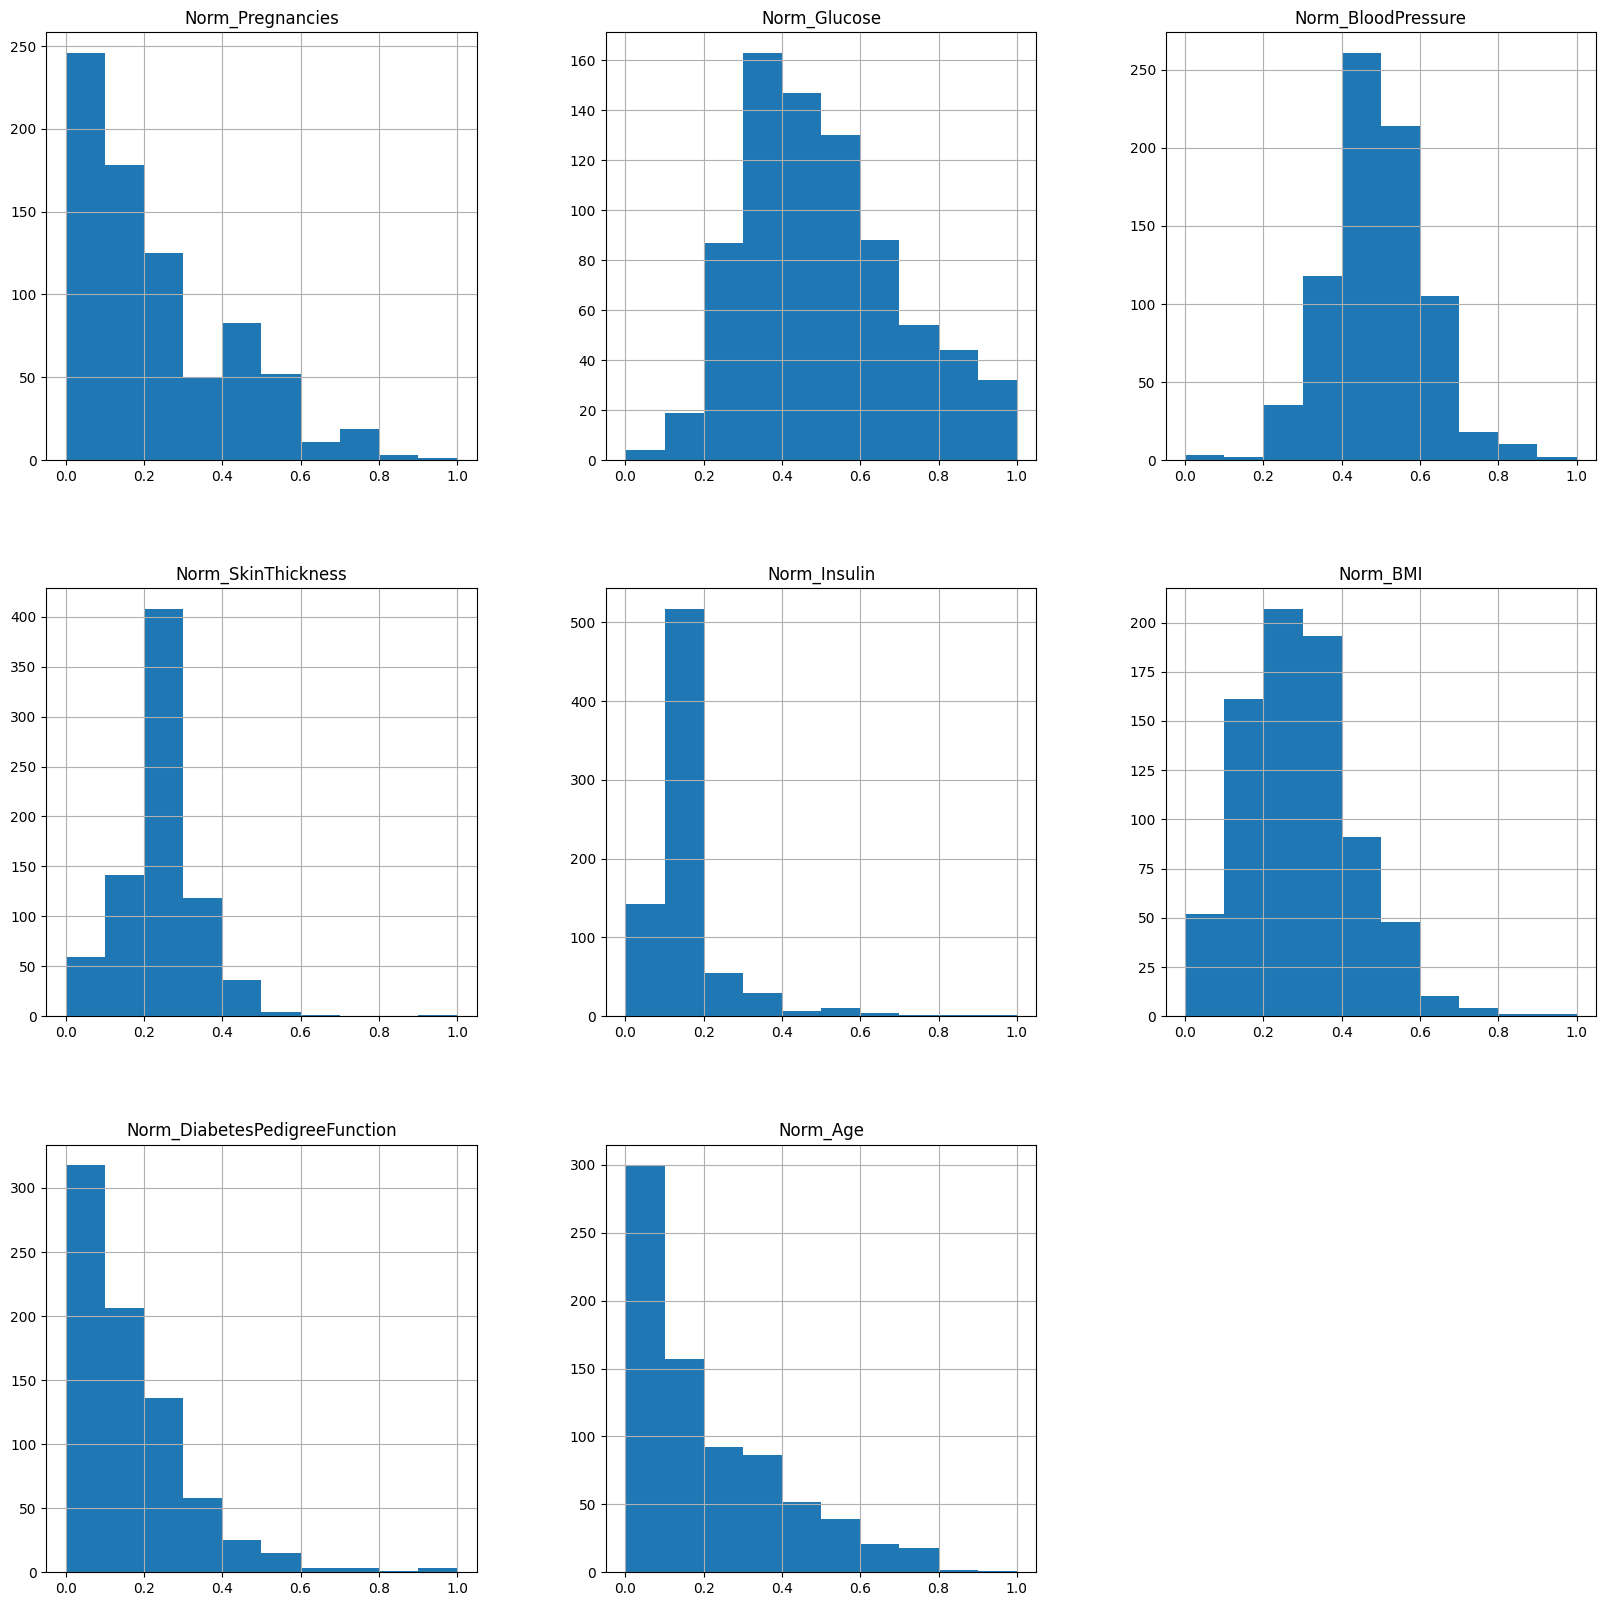

In [76]:
# view histogram data for columns 10:17
data.iloc[:,10:18].hist(figsize=(20,20))
plt.show()

In [77]:
# describe the normalised columns
data[normalised_columns].describe()

,Norm_Pregnancies,Norm_Glucose,Norm_BloodPressure,Norm_SkinThickness,Norm_Insulin,Norm_BMI,Norm_DiabetesPedigreeFunction,Norm_Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240305,0.152250,0.291518,0.168179,0.204015
std,0.198210,0.196361,0.123432,0.095557,0.103826,0.140597,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.239130,0.133413,0.288344,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Norm_Pregnancies'),
  Text(2, 0, 'Norm_Glucose'),
  Text(3, 0, 'Norm_BloodPressure'),
  Text(4, 0, 'Norm_SkinThickness'),
  Text(5, 0, 'Norm_Insulin'),
  Text(6, 0, 'Norm_BMI'),
  Text(7, 0, 'Norm_DiabetesPedigreeFunction'),
  Text(8, 0, 'Norm_Age')])

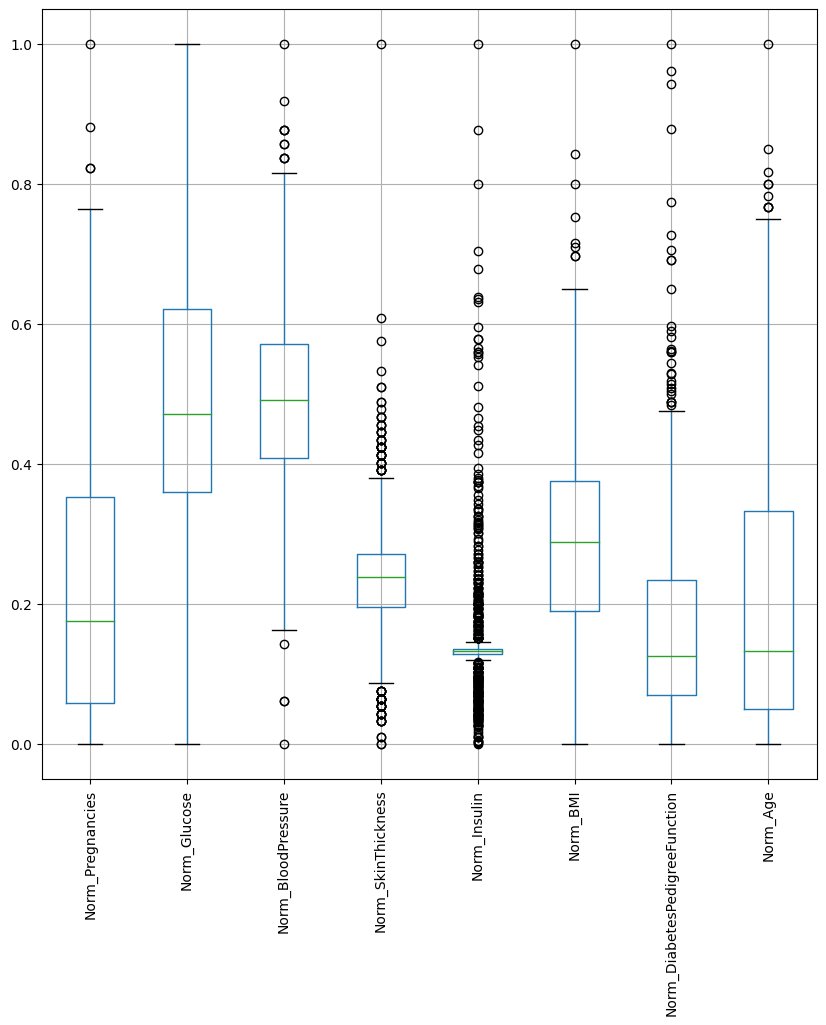

In [78]:
# view a boxplot of the Norm_ columns
data[normalised_columns].boxplot(figsize=(10,10))
plt.xticks(rotation=90)




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

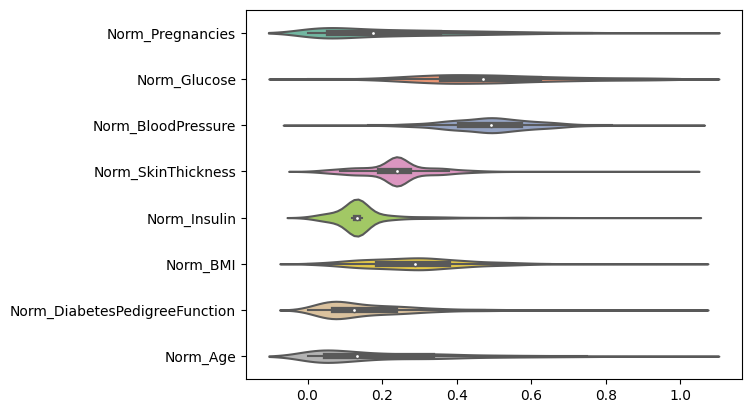

In [79]:
# create a violin plot for the normalised columns
sns.violinplot(data=data[normalised_columns], orient='h', palette='Set2')
# show the quartiles


In [80]:
# inter quartile range of skin thickness (25% - 75%)
#Q1 = data['Norm_SkinThickness'].quantile(0.25)
#Q3 = data['Norm_SkinThickness'].quantile(0.75)
#IQR = Q3 - Q1
# remove outliers above upper whiskers 
#upper_whisker = data['Norm_SkinThickness'].quantile(0.75) + 1.5*IQR
#data = data[data['Norm_SkinThickness'] < upper_whisker]
#print(upper_whisker) # 0.38

# remove outliers below lower whiskers
#lower_whisker = data['Norm_SkinThickness'].quantile(0.25) - 1.5*IQR
#data = data[data['Norm_SkinThickness'] > lower_whisker]




([<matplotlib.axis.XTick at 0x14f609330>,
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

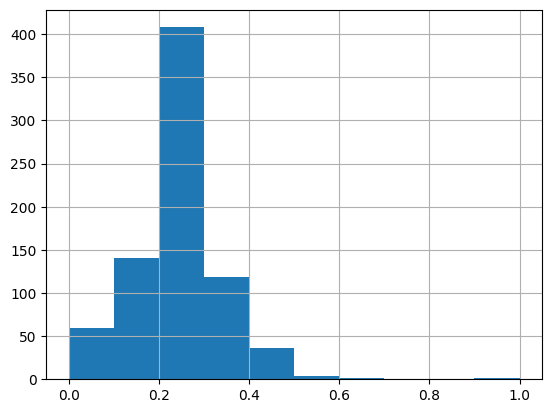

In [81]:

# show a histogram of the norm_skinthickness column
data['Norm_SkinThickness'].hist()
# x tickes between 0 and 1
plt.xticks(np.arange(0,1.2,0.2))

In [82]:
# predict if a patient has diabetes or not

# the data is ready to be used to train a model
# split the data into independent 'X' and dependent 'Y' variables
X = data.iloc[:, 10:18].values # does not include column 8 = the values to use to predict
Y = data.iloc[:, 8].values # only column 9  = the values to predict 

# split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [83]:
# scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Accuracy:  0.8051948051948052


<AxesSubplot: >

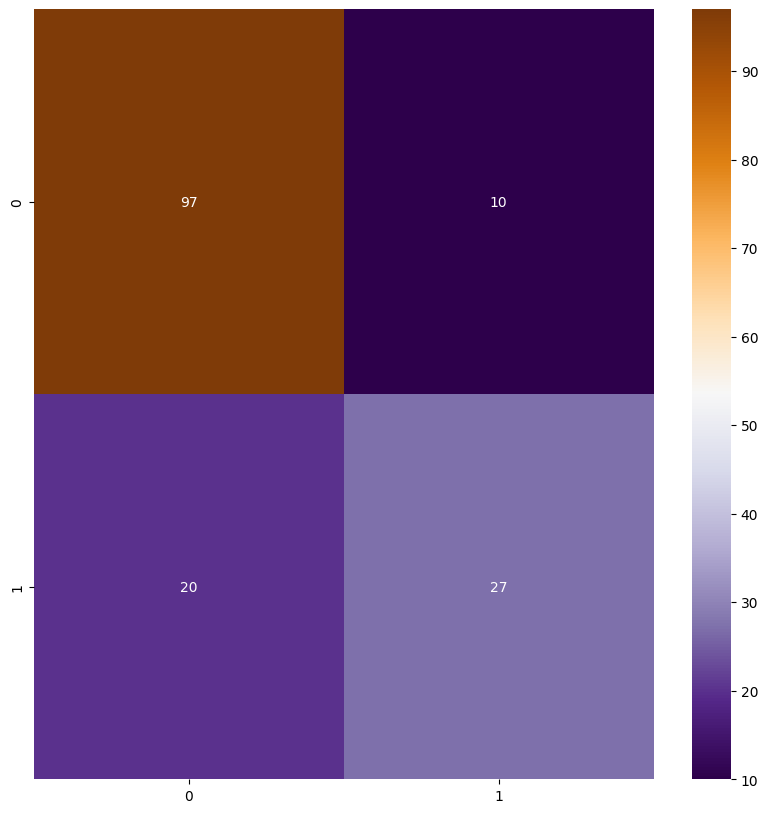

In [84]:
# try SVM 
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, Y_train)
# make predictions
Y_pred = classifier.predict(X_test)
# put results in a dataframe
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df
# check the accuracy of the model
print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))
# confusion matrix
cm = metrics.confusion_matrix(Y_test, Y_pred)
cm
# plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='PuOr_r') 

In [85]:
# try K - nearest neighbor
# the data is ready to be used to train a model
# split the data into independent 'X' and dependent 'Y' variables
X = data.iloc[:, 10:18].values # does not include column 8 = the values to use to predict
Y = data.iloc[:, 8].values # only column 9  = the values to predict 

# split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# find the best k value
# find the square root of the number of rows in the data
k = sqrt(len(Y_test))
print(k)
# round the number up
k = round(k)
print(k)

knn_model = KNeighborsClassifier(n_neighbors=13) # define kNN model with k=3

knn_model.fit(X_train, Y_train) # fit kNN model

# Make prediction
y_pred = knn_model.predict(X_test)

# Accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

# Root Mean Squared Error
print("RMSE:", sqrt(metrics.mean_squared_error(Y_test, y_pred)))

12.409673645990857
12
Accuracy: 0.8376623376623377
RMSE: 0.40291148201269017


Accuracy (gini): 0.7402597402597403
Accuracy (entropy): 0.6948051948051948
Accuracy (depth): 0.7207792207792207


[Text(0.45170454545454547, 0.9166666666666666, 'Glucose <= 0.513\ngini = 0.461\nsamples = 614\nvalue = [393, 221]\nclass = non-diabetic'),
 Text(0.23295454545454544, 0.75, 'Age <= 0.125\ngini = 0.301\nsamples = 352\nvalue = [287, 65]\nclass = non-diabetic'),
 Text(0.125, 0.5833333333333334, 'BMI <= 0.261\ngini = 0.162\nsamples = 202\nvalue = [184, 18]\nclass = non-diabetic'),
 Text(0.06818181818181818, 0.4166666666666667, 'Pregnancies <= 0.412\ngini = 0.038\nsamples = 104\nvalue = [102, 2]\nclass = non-diabetic'),
 Text(0.045454545454545456, 0.25, 'DiabetesPedigreeFunction <= 0.254\ngini = 0.019\nsamples = 103\nvalue = [102, 1]\nclass = non-diabetic'),
 Text(0.022727272727272728, 0.08333333333333333, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]\nclass = non-diabetic'),
 Text(0.06818181818181818, 0.08333333333333333, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = non-diabetic'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = diabetic'),
 Text(0.181

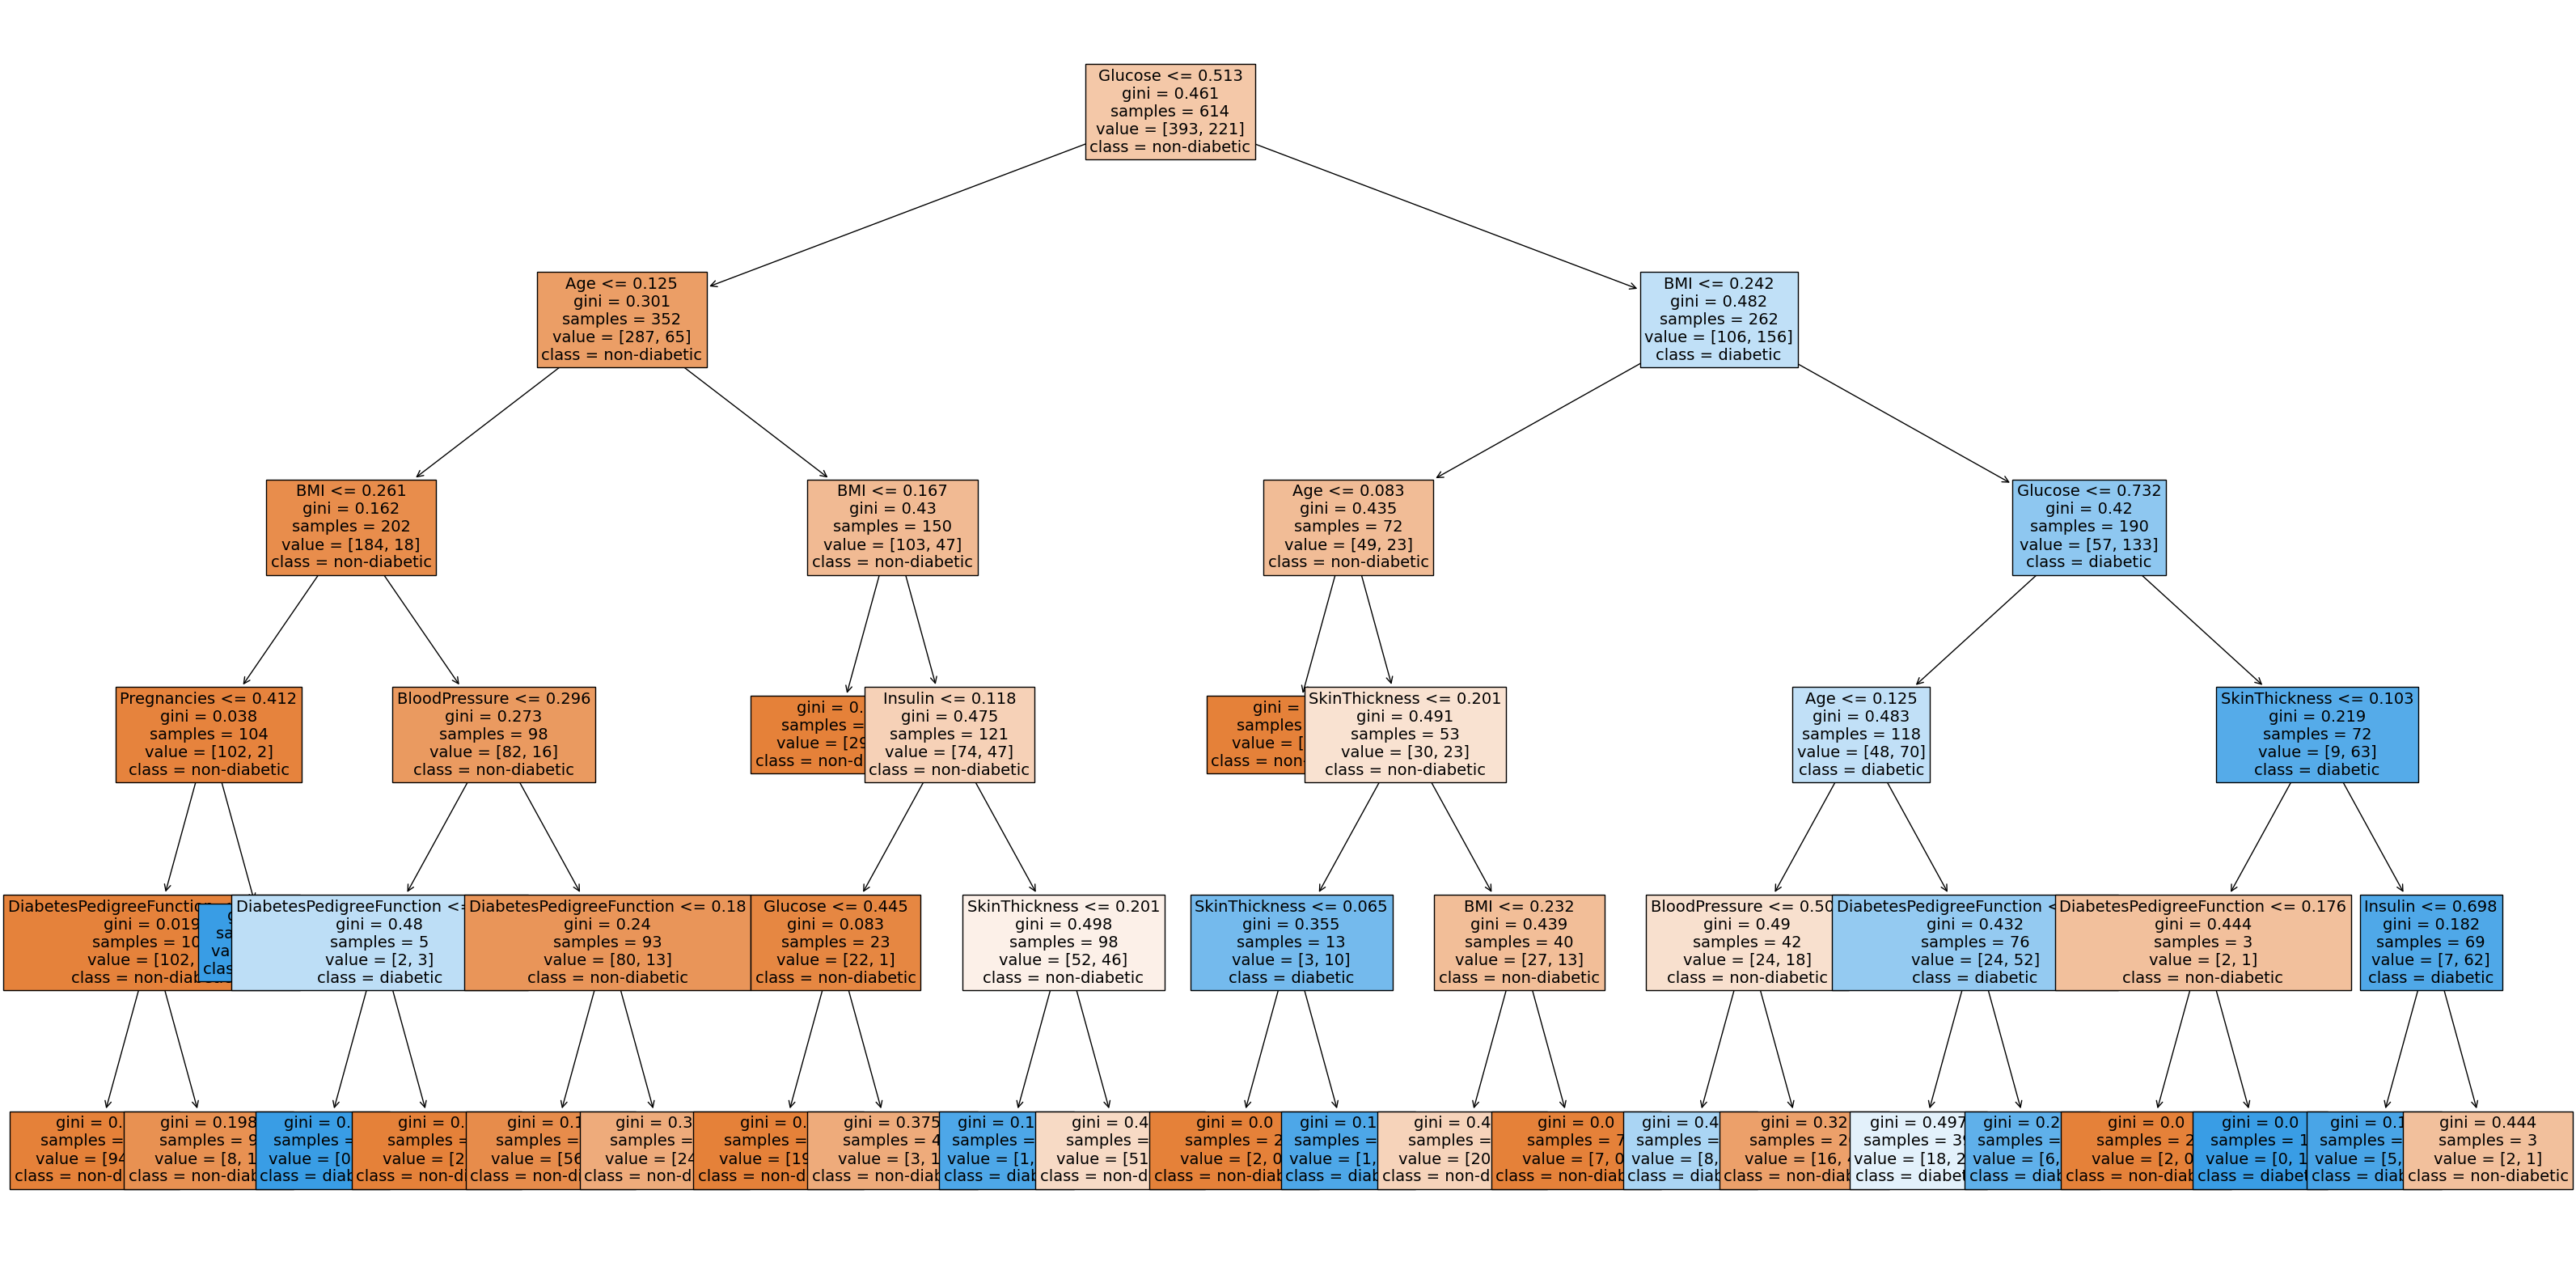

In [86]:
# try decision tree
# Create default Decision Tree classifer object
decisionTree_model_gini = DecisionTreeClassifier()

# Use entropy criterion
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use max depth of 3
decisionTree_model_depth = DecisionTreeClassifier(max_depth=5)

# Fit the trees
decisionTree_model_gini.fit(X_train,Y_train)
decisionTree_model_entropy.fit(X_train,Y_train)
decisionTree_model_depth.fit(X_train,Y_train)

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth.predict(X_test)

print("Accuracy (gini):",metrics.accuracy_score(Y_test, y_pred_gini))
print("Accuracy (entropy):",metrics.accuracy_score(Y_test, y_pred_entropy))
print("Accuracy (depth):",metrics.accuracy_score(Y_test, y_pred_depth3))

# plot a decision tree
plt.figure(figsize=(40,20))
sk.tree.plot_tree(decisionTree_model_depth, filled=True, fontsize=14, feature_names=data.columns[0:8], class_names=['non-diabetic', 'diabetic'])
# label the tree